# Домашня робота №10

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


### Завантажимо та розіб'ємо датасет

In [41]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
x_train_full = x_train_full[..., np.newaxis] / 255.0 
x_test = x_test[..., np.newaxis] / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=101)


### Побудуємо архітектуру моделі, додамо регулярізацію та dropout

In [48]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


### Будуємо модель та навчаємо її

In [49]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_val, y_val))


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Точність на тестовому наборі: {test_accuracy * 100:.2f}%")

Epoch 1/10
750/750 [==============================] - 32s 41ms/step - loss: 0.6617 - accuracy: 0.8048 - val_loss: 0.4454 - val_accuracy: 0.8683
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4031 - accuracy: 0.8773 - val_loss: 0.3608 - val_accuracy: 0.8887
Epoch 3/10
750/750 [==============================] - 31s 42ms/step - loss: 0.3457 - accuracy: 0.8914 - val_loss: 0.3381 - val_accuracy: 0.8942
Epoch 4/10
750/750 [==============================] - 32s 43ms/step - loss: 0.3129 - accuracy: 0.9011 - val_loss: 0.3214 - val_accuracy: 0.8965
Epoch 5/10
750/750 [==============================] - 33s 44ms/step - loss: 0.2899 - accuracy: 0.9105 - val_loss: 0.2973 - val_accuracy: 0.9062
Epoch 6/10
750/750 [==============================] - 32s 43ms/step - loss: 0.2688 - accuracy: 0.9170 - val_loss: 0.3050 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 32s 43ms/step - loss: 0.2529 - accuracy: 0.9230 - val_loss: 0.2827 - val_accuracy:

### Візуалізуємо наші результати

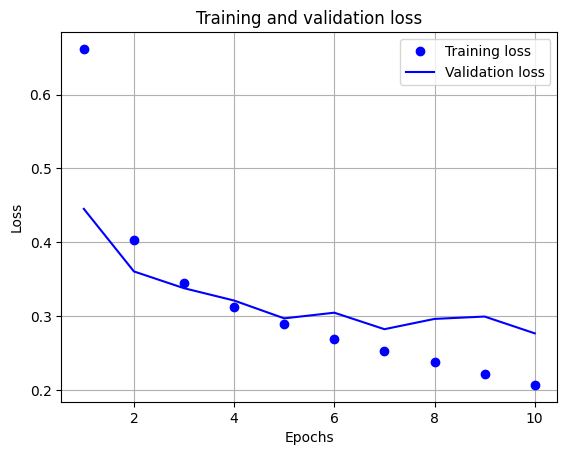

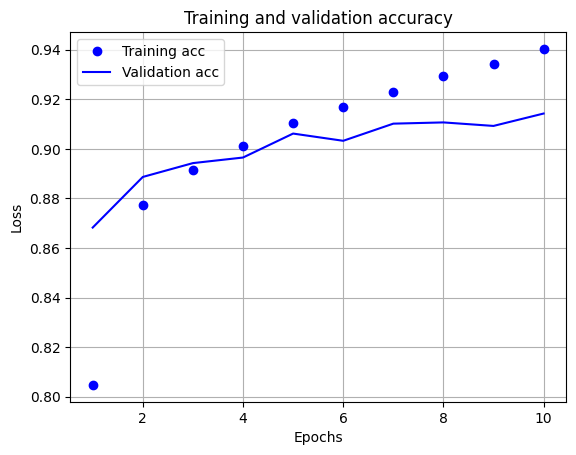

In [50]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
